#### Problem 1
#### Inspect the dataset titled lab01_dataset_1.csv which has a mixture of numerical and categorical data. Your task will be to write a function my_ID3( ) which can create a decision tree for the given dataset using the ID3 algorithm. However, before doing that, you will be have to perform some data processing tasks. Here are all the required tasks in order –

In [1]:
# The code is importing the necessary libraries for data manipulation and preprocessing.
import pandas as pd
import numpy as np
import pprint
from sklearn.preprocessing import OrdinalEncoder
eps = np.finfo(float).eps
print(eps)

2.220446049250313e-16


In [2]:
# The code read_csv method is used read a CSV file named "lab01_dataset_1.csv" and storing the whole dataset in a variable called data.
data = pd.read_csv("lab01_dataset_1.csv")
# This is a method in pandas that is used to display the first few rows of a DataFrame of a dataset. 
# By default, it displays the first 5 rows.
data.head()

,Mood,Effort,Score,Output
0,Happy,Low,35,Yes
1,Happy,Medium,91,No
2,Happy,High,52,No
3,Neutral,Low,83,No
4,Neutral,Medium,48,No


##### 1. ID3 cannot handle continuous numerical data. Perform necessary operations to handle all continuous-valued attributes. Do not forget to show the output i.e., the updated dataset after handling continuous-valued attributes. (2 marks

In [3]:
# This is a method in pandas that is used to display the last few rows of a DataFrame of a dataset. 
# By default, it displays the last 5 rows.
data.tail()

,Mood,Effort,Score,Output
14,Neutral,High,50,No
15,Sad,Low,69,No
16,Sad,Medium,70,Yes
17,Sad,High,95,No
18,Sad,Low,80,Yes


In [4]:
# The code is printing the column names of the dataframe, 
# the shape (number of rows and columns) of the dataframe,
# and the data types of each column in the dataframe.
print(data.columns)
print(data.shape)
print(data.dtypes)

Index(['Mood', 'Effort', 'Score', 'Output'], dtype='object')
(19, 4)
Mood      object
Effort    object
Score      int64
Output    object
dtype: object


In [5]:
# sort the data by score
# The code is defining a method called sortDataFrameByScore() that takes the data as parameter.
# Inside the function, it sorts the `data` by the feature named 'Score' in ascending order and 
# reassigns the sorted DataFrame back to the `data` variable. It then returns the sorted DataFrame.
def sortDataFrameByScore(data):
    data = data.sort_values(by='Score', ignore_index=True)
    data.head()
    return data

# The above code is calling the sortDataFrameByScore() method and passing the `data` variable as an argument. 
data = sortDataFrameByScore(data)
data

,Mood,Effort,Score,Output
0,Happy,Low,35,Yes
1,Happy,High,39,Yes
2,Sad,Low,40,Yes
3,Happy,Low,44,Yes
4,Neutral,Medium,48,No
5,Neutral,High,50,No
6,Happy,High,52,No
7,Neutral,High,61,No
8,Happy,Low,66,No
9,Sad,Low,69,No


In [6]:
def splitPoint(data):
    # The code is creating a new DataFrame called `attributeDataFrame` by using the `pd.DataFrame()` method.
    #. It is passing a dictionary as an argument, where the keys are the column names ('Score' and 'Output') 
    # and the values are the corresponding data from the 'Score' and 'Output' columns of the dataset..
    attributeDataFrame = pd.DataFrame({ 'Score' : data['Score'], 'Output' : data['Output']})
    attributeDataFrame.reindex(np.arange(len(attributeDataFrame['Score'].index)))

    outputvalue = attributeDataFrame['Output'][0]

    splitPointDict = {}

    # The for loop, iterates over the indices of the 'Score' column startimng with 1 in the attributeDataFrame.
    for i in range(1, len(attributeDataFrame['Score'])):
        if(attributeDataFrame['Output'][i] != outputvalue):
            mean = (attributeDataFrame['Score'][i-1] + attributeDataFrame['Score'][i])/2
            splitPointDict[i-1] = mean
            outputvalue = attributeDataFrame['Output'][i]
        
    pprint.pprint(splitPointDict)
    return attributeDataFrame, splitPointDict
attributeDataFrame, splitPoint = splitPoint(data)


{3: 46.0, 9: 69.5, 13: 81.5}


In [7]:
# The for loop is iterating over the values in the `splitPoint` variable. For each value, it assigns it to the variable `split` and then prints it.

for i in splitPoint:
    split = splitPoint[i]
    print(splitPoint[i])
    ltYes = 0
    ltNo = 0
    gtYes = 0
    gtNo = 0

    # This is the inner loop which iterates over the range of values from 0 to the length of the 'Score' column in the attributeDataFrame.
    # It increments ltYes/ ltNo/ gtYes/ gtNo to the respective conditions.
    for j in range(0, len(attributeDataFrame['Score'])):
        if attributeDataFrame['Score'][j] < split and attributeDataFrame['Output'][j] == 'Yes':
            ltYes+=1
        if attributeDataFrame['Score'][j] < split and attributeDataFrame['Output'][j] == 'No':
            ltNo+=1

        if attributeDataFrame['Score'][j] >= split and attributeDataFrame['Output'][j] == 'Yes':
            gtYes+=1
        if attributeDataFrame['Score'][j] >= split and attributeDataFrame['Output'][j] == 'No':
            gtNo+=1

    print(ltYes , " | " , ltNo  , " | " , gtYes , " | " , gtNo)

46.0
4  |  0  |  4  |  11
69.5
4  |  6  |  4  |  5
81.5
8  |  6  |  0  |  5


In [8]:
columnsList = {}

# The code is creating a dictionary called `columnsList` to store the results of the comparison between the 'Score' column values and the `split` values.
for i in splitPoint:
    split = splitPoint[i]
    # "Score_" + str(split)
    scoreList=[]
    # The code is iterating over the indices of the 'Score' column in the attributeDataFrame. 
    # For each index `j`, it checks if the value at that index in the 'Score' column is less than the current `split` value. 
    # If it is, it appends 1 to the `scoreList` list. Otherwise, it appends 0. 
    # This process is repeated i < length of attributeDataFrame['Score']
    for j in range(0, len(attributeDataFrame['Score'])):
        if attributeDataFrame['Score'][j] < split:
            scoreList.append(1) # ("Score_" + str(split) + "True")
        else: 
            scoreList.append(0) # ("Score_" + str(split) + "False")

    columnsList["Score_" + str(split)] = scoreList

pprint.pprint(columnsList)

{'Score_46.0': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Score_69.5': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Score_81.5': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]}


In [9]:
# The code is creating a new DataFrame called `data` by selecting specific columns from an existing DataFrame called `data`. 
# The selected columns are 'Mood', 'Effort', 'Score_46.0', 'Score_69.5', 'Score_81.5', and 'Output'. 
# feature Score is dropped
data = pd.DataFrame({
    'Mood' : data['Mood'], 
    'Effort' : data['Effort'], 
    'Score_46.0' : columnsList['Score_46.0'], 
    'Score_69.5' : columnsList['Score_69.5'], 
    'Score_81.5' : columnsList['Score_81.5'],
    'Output' : data['Output']
})

data.head()

,Mood,Effort,Score_46.0,Score_69.5,Score_81.5,Output
0,Happy,Low,1,1,1,Yes
1,Happy,High,1,1,1,Yes
2,Sad,Low,1,1,1,Yes
3,Happy,Low,1,1,1,Yes
4,Neutral,Medium,0,1,1,No


In [10]:
moodUniqueValues = list(np.asarray(data['Mood'].unique()))
encoderMood = OrdinalEncoder(categories=[list(moodUniqueValues)])
# data['Mood'] = encoderMood.fit_transform(data[['Mood']])

effortUniqueValues = list(np.asarray(data['Effort'].unique()))
encoderEffort = OrdinalEncoder(categories=[list(effortUniqueValues)])
# data['Effort'] = encoderEffort.fit_transform(data[['Effort']])

outputUniqueValues = list(np.asarray(data['Output'].unique()))
encoderOutput = OrdinalEncoder(categories=[list(outputUniqueValues)])
# data['Output'] = encoderOutput.fit_transform(data[['Output']])

print(moodUniqueValues)
print(effortUniqueValues)
print(outputUniqueValues)

data.head()

['Happy', 'Sad', 'Neutral']
['Low', 'High', 'Medium']
['Yes', 'No']


,Mood,Effort,Score_46.0,Score_69.5,Score_81.5,Output
0,Happy,Low,1,1,1,Yes
1,Happy,High,1,1,1,Yes
2,Sad,Low,1,1,1,Yes
3,Happy,Low,1,1,1,Yes
4,Neutral,Medium,0,1,1,No


#### 2. Next, you will have to ensure the newly obtained dataset is optimal and free of errors. Take appropriate actions based on the outcomes.

- a. Check if the dataset has any missing values. (1 mark)

In [11]:
# The code is checking for missing values in the dataframe called data.
missingValues = data.isnull()
print(missingValues)

     Mood  Effort  Score_46.0  Score_69.5  Score_81.5  Output
0   False   False       False       False       False   False
1   False   False       False       False       False   False
2   False   False       False       False       False   False
3   False   False       False       False       False   False
4   False   False       False       False       False   False
5   False   False       False       False       False   False
6   False   False       False       False       False   False
7   False   False       False       False       False   False
8   False   False       False       False       False   False
9   False   False       False       False       False   False
10  False   False       False       False       False   False
11  False   False       False       False       False   False
12  False   False       False       False       False   False
13  False   False       False       False       False   False
14  False   False       False       False       False   False
15  Fals

In [12]:
# The code is checking for missing values in every column of data.

for i in data.columns:
    print("Any missing values in " ,i, ":" , data[i].isnull().any())

Any missing values in  Mood : False
Any missing values in  Effort : False
Any missing values in  Score_46.0 : False
Any missing values in  Score_69.5 : False
Any missing values in  Score_81.5 : False
Any missing values in  Output : False


- b. Check if the dataset has any redundant or repeated input sample. (1 mark)


In [13]:
# The code is checking for duplicates in a DataFrame called `dataFrame`.
# Checking for duplicates

dataFrame = pd.DataFrame(data)
duplicatedRows = dataFrame[dataFrame.duplicated()]
print(duplicatedRows)

       Mood  Effort  Score_46.0  Score_69.5  Score_81.5 Output
3     Happy     Low           1           1           1    Yes
7   Neutral    High           0           1           1     No
16    Happy  Medium           0           0           0     No


#### c. Check if the dataset has any contradicting <input, output> pairs. (1 mark)

In [14]:
# The code is creating a pandas DataFrame called `dataFrame` from a variable called data. 

dataFrame = pd.DataFrame(data)
print(list(data.columns))

# The below  is used to create a new DataFrame called `contradicting` that contains rows from the original DataFrame `dataFrame` where there are duplicate values in all columns.
contradicting = dataFrame[dataFrame.duplicated(subset=list(data.columns), keep=False)]

print("Original X dataframe : ")
print(dataFrame)
print("\nContradicting <input, output> Pairs:")
print(contradicting)

['Mood', 'Effort', 'Score_46.0', 'Score_69.5', 'Score_81.5', 'Output']
Original X dataframe : 
       Mood  Effort  Score_46.0  Score_69.5  Score_81.5 Output
0     Happy     Low           1           1           1    Yes
1     Happy    High           1           1           1    Yes
2       Sad     Low           1           1           1    Yes
3     Happy     Low           1           1           1    Yes
4   Neutral  Medium           0           1           1     No
5   Neutral    High           0           1           1     No
6     Happy    High           0           1           1     No
7   Neutral    High           0           1           1     No
8     Happy     Low           0           1           1     No
9       Sad     Low           0           1           1     No
10      Sad  Medium           0           0           1    Yes
11      Sad    High           0           0           1    Yes
12  Neutral  Medium           0           0           1    Yes
13      Sad     Low    

#### 3. Your function my_ID3() should operate in a manner such that after every round of decision making, it will output the attributes and its associated gain, with a message stating “Attribute X with Gain = Y is chosen as the decision attribute”. Once your function completes, it should output the decision tree. The representation of the decision tree is upto you. You can choose either a textual representation or a graphical one; either is fine. (10 marks)

In [15]:
'''
This method calculates the entropy of a dataset by getting the target class, finding the proportion of each unique target value, 
and multiplying it by the log of the proportion. It sums these values to get the total entropy.
This entropy method loops through the unique target values, calculates the proportion of samples with that value, 
and multiplies it by the log of the proportion. The results are summed to get the total entropy of the target class.
''' 
def calculateEntropy(data):
    targetClass = data.keys()[-1]
    print("target Class in entropy : " + targetClass)
    entropyValue = 0
    targetClassUnique = data[targetClass].unique()

    for item in targetClassUnique:
        proportion = data[targetClass].value_counts()[item]/ len (data[targetClass])
        entropyValue += -proportion * np.log2(proportion)

    return entropyValue

In [16]:
# This function calculates the entropy of a given attribute based on the target class in the provided data.
# It iterates through unique attribute values, computing entropy using target class frequencies, and returns the absolute entropy value.

def getInformationGain(data,attribute):
    targetClass = data.keys()[-1]
    print("target Class in entropy attribute : " + targetClass)
    targetUniqueValues = data[targetClass].unique()
    
    attributeUniqueValue = data[attribute].unique()
    entropyValue = 0

    for unique in attributeUniqueValue:
        entropy = 0
        for target in targetUniqueValues:
            num = len(data[attribute][data[attribute] == unique][data[targetClass] == target])
            den = len(data[attribute][data[attribute] == unique])

            fraction = num/ (den + eps)
            entropy += -fraction * np.log2(fraction + eps)
        
        fraction2=den/len(data)
        print("FRACTION : " , fraction , " | FRACTION2 : ", fraction2)
        entropyValue += -fraction2 * entropy

    return abs(entropyValue)

In [17]:
# The code defines a method called `builtClassifier` that takes in a parameter `data`.
def builtClassifier(data):
    informationGain = []

    # The code is iterating over each key in the `data` dictionary, excluding the last key. 
    # For each key, it is printing the key, the entropy of the data, 
    # and the information gain calculated using the `calculateEntropy` and `getEntropyAttribute` functions. 
    # It then appends the calculated information gain to the `informationGain` list.
    for key in data.keys()[:-1]:
        print(key, " -> Entropy : ", calculateEntropy(data) , ' -> Info Gain : ' , getInformationGain(data, key) )
        informationGain.append(calculateEntropy(data) - getInformationGain(data, key))

    return data.keys()[:-1][np.argmax(informationGain)] 

In [18]:
# The code `data[data[feature] == value]` is filtering the `data` table based on a specific condition. 
# It checks if the values in the `feature` column of the `data` table are equal to the `value` provided. 
# This will return a subset of the `data` table where the condition is true.
def getSubtable(data, feature, value):
    return data[data[feature] == value].reset_index(drop=True)

In [19]:
def my_ID3(data, tree=None):
    targetClass = data.keys()[-1]
    attribute = builtClassifier(data)

    # The line `attributeUnique = np.unique(data[attribute])` is finding the unique values of the attribute in the given dataset `data`. It uses the `np.unique()` function from the NumPy library to return an array of unique values in the attribute column of the dataset.
    attributeUnique = np.unique(data[attribute])

    # The below code is checking if the `tree` parameter is `None`. If it is `None`, it means that the function is being called for the first time and a new decision tree needs to be created. 
    # In this case, the code initializes an empty dictionary `tree` and adds an empty dictionary as a value for the `attribute` key in the `tree` dictionary.
    # This is done to start building the decision tree structure.
    if tree is None:
        tree = {}
        tree[attribute] = {}

    # The for loop block is a recursive mehod that implements the ID3 algorithm for building a decision tree.
    # This loop iterates through unique values of the current attribute, creating subtables.
    # For each unique value, it builds the decision tree recursively using the ID3 algorithm, assigning values based on target class frequencies. 

    for unique in attributeUnique:
        subTable = getSubtable(data, attribute, unique)
        print("UNIQUE VALLUE : " , unique)
        
        targetValues, valueCounts = np.unique(subTable[targetClass], return_counts=True)

        if len(valueCounts) == 1:
            tree[attribute][unique] = targetValues[0]
        else:
            tree[attribute][unique] = my_ID3(subTable)
        
        print("tree : ", tree)
        print()
    return tree

In [20]:
'''
The code is printing the first few rows of the `data` dataframe using the `head()` function. 
Then, it is creating a decision tree using the `my_ID3()` function and assigning it to the `decisionTree` variable. 
Finally, it is pretty printing the decision tree using the `pprint.pprint()` function.
'''
print(data.head())
decisionTree = my_ID3(data)
pprint.pprint(decisionTree)

      Mood  Effort  Score_46.0  Score_69.5  Score_81.5 Output
0    Happy     Low           1           1           1    Yes
1    Happy    High           1           1           1    Yes
2      Sad     Low           1           1           1    Yes
3    Happy     Low           1           1           1    Yes
4  Neutral  Medium           0           1           1     No
target Class in entropy : Output
target Class in entropy attribute : Output
FRACTION :  0.5714285714285714  | FRACTION2 :  0.3684210526315789
FRACTION :  0.42857142857142855  | FRACTION2 :  0.3684210526315789
FRACTION :  0.8  | FRACTION2 :  0.2631578947368421
Mood  -> Entropy :  0.9819407868640977  -> Info Gain :  0.9159386515219116
target Class in entropy : Output
target Class in entropy attribute : Output
FRACTION :  0.5714285714285714  | FRACTION2 :  0.3684210526315789
FRACTION :  0.42857142857142855  | FRACTION2 :  0.3684210526315789
FRACTION :  0.8  | FRACTION2 :  0.2631578947368421
target Class in entropy : Output


### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Problem 2
#### Inspect the dataset titled lab01_dataset_2.csv which also has a mixture of numerical and categorical data. For this problem, you will use decision tree classifiers for supervised learning. In particular, you will be using the functionalities of the sklearn.tree library. The classification task using sklearn libraries work only on numerical-valued attributes, and not on categorical ones. (What to do now? Hint: Look up One-hot Encoding and Integer Encoding). Here are all the required tasks –


In [21]:
# The code is importing various libraries and modules that are commonly used in data analysis and machine learning tasks.
import pandas as pdx
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from IPython.display import Image
import os

In [22]:
# The code read_csv method is used read a CSV file named "lab01_dataset_2.csv" and storing the whole dataset in a variable called data.
data = pd.read_csv("lab01_dataset_2.csv")

# This is a method in pandas that is used to display the first few rows of a DataFrame of a dataset. 
# By default, it displays the first 5 rows.
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Output
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [23]:
# This is a method in pandas that is used to display the last few rows of a DataFrame of a dataset. 
# By default, it displays the last 5 rows.
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Output
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [24]:
# The code is printing the column names of the dataframe, 
# the shape (number of rows and columns) of the dataframe,
# and the data types of each column in the dataframe.print("Data set columns : ", data.columns)
print("Shape of the dataset : ", data.shape)
print("Datatypes of dataset :\n",data.dtypes)

Shape of the dataset :  (200, 6)
Datatypes of dataset :
 Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Output          object
dtype: object


In [25]:
# The code is printing the unique values of the 'Sex', 'BP', 'Cholesterol', and 'Output' columns in the 'data' dataset. It concatenates the string "Gender Unique : " with the unique values of the 'Sex' column, and similarly for the other columns.
print("Gender Unique : " + data['Sex'].unique())
print("BP Unique : " + data['BP'].unique())
print("Cholesterol Unique : " + data['Cholesterol'].unique())
print("Output Unique : " + data['Output'].unique())

['Gender Unique : F' 'Gender Unique : M']
['BP Unique : HIGH' 'BP Unique : LOW' 'BP Unique : NORMAL']
['Cholesterol Unique : HIGH' 'Cholesterol Unique : NORMAL']
['Output Unique : drugY' 'Output Unique : drugC' 'Output Unique : drugX'
 'Output Unique : drugA' 'Output Unique : drugB']


## - a) Restructure the dataset such that it has all numerical-valued attributes using one Hot Encoding

In [26]:
# The code is creating an instance of the OneHotEncoder class with the handle_unknown parameter set to 'ignore' and the sparse_output parameter set to False.
oneHotEncoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
oneHotEncoder.set_output(transform='pandas')

# The below lines of code isused to fit the OneHotEncoder to the specified columns of the `data` DataFrame and transforming those columns into one-hot encoded features. The resulting transformed data is stored in the `oneHotEncoderTransform` variable.
oneHotEncoderTransform = oneHotEncoder.fit_transform(data[['Sex', 'Cholesterol', 'BP', 'Output']])

oneHotEncoderTransform.head()

,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL,Output_drugA,Output_drugB,Output_drugC,Output_drugX,Output_drugY
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# `oneHotEncoderTransform.columns` is accessing the columns of the `oneHotEncoderTransform` object. 
# It returns a list of column names or labels of the encoded data.
oneHotEncoderTransform.columns

Index(['Sex_F', 'Sex_M', 'Cholesterol_HIGH', 'Cholesterol_NORMAL', 'BP_HIGH',
       'BP_LOW', 'BP_NORMAL', 'Output_drugA', 'Output_drugB', 'Output_drugC',
       'Output_drugX', 'Output_drugY'],
      dtype='object')

In [28]:
# The code is creating two pandas DataFrames, `X` and `Y`.

X = pd.DataFrame(
    { 
        'Age' : data['Age'],
        'Sex_F' : oneHotEncoderTransform['Sex_F'],
        'Sex_M' : oneHotEncoderTransform['Sex_M'],
        'Cholesterol_HIGH' : oneHotEncoderTransform['Cholesterol_HIGH'],
        'Cholesterol_NORMAL' : oneHotEncoderTransform['Cholesterol_NORMAL'],
        'BP_HIGH' : oneHotEncoderTransform['BP_HIGH'],
        'BP_LOW' : oneHotEncoderTransform['BP_LOW'],
        'BP_NORMAL' : oneHotEncoderTransform['BP_NORMAL'],
        'Na_to_K' : data['Na_to_K']
    }
)

Y = pd.DataFrame(
    { 
        'Output_drugA' :list(oneHotEncoderTransform['Output_drugA']),
        'Output_drugB' :list(oneHotEncoderTransform['Output_drugB']),
        'Output_drugC' :list(oneHotEncoderTransform['Output_drugC']),
        'Output_drugX' :list(oneHotEncoderTransform['Output_drugX']),
        'Output_drugY' :list(oneHotEncoderTransform['Output_drugY']),
    }
)
Y.head()

,Output_drugA,Output_drugB,Output_drugC,Output_drugX,Output_drugY
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [29]:
# `X.head()` is a method used to display the first few rows of a DataFrame or Series `X`. It is commonly used to quickly inspect the data and get a sense of its structure and contents.
X.head()

,Age,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL,Na_to_K
0,23,1.0,0.0,1.0,0.0,1.0,0.0,0.0,25.355
1,47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,13.093
2,47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,10.114
3,28,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.798
4,61,1.0,0.0,1.0,0.0,0.0,1.0,0.0,18.043


## 2. Perform supervised learning using decision tree classifiers. Employ the train-test split approach during the learning. (4 marks)

In [30]:
# The code is splitting the dataset `X` and `Y` into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state = 12)

print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(180, 9)
(20, 9)
(180, 5)
(20, 5)


In [33]:
# This method is used to display the first few rows of the DataFrame `X_train`.
X_train.head()

,Age,Sex_F,Sex_M,Cholesterol_HIGH,Cholesterol_NORMAL,BP_HIGH,BP_LOW,BP_NORMAL,Na_to_K
185,57,1.0,0.0,0.0,1.0,0.0,0.0,1.0,25.893
166,58,1.0,0.0,1.0,0.0,0.0,1.0,0.0,26.645
101,45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,12.854
129,32,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.477
113,65,1.0,0.0,0.0,1.0,0.0,1.0,0.0,13.769


In [34]:
# The below code is used to create an instance of the DecisionTreeClassifier class and assigning it to the variable `decisionTree`. This instance can be used to train a decision tree model on a given dataset.
decisionTree = DecisionTreeClassifier()
# The below code is training the decision tree model on the training data. It takes the features `X_train` and the corresponding labels `Y_train` as input and fits the model to the training data. This process involves finding the optimal splits in the data based on the features and labels provided.
decisionTree.fit(X_train, Y_train)
# The below code is using the trained decision tree model to make predictions on the test data. It takes the features `X_test` as input and returns the predicted labels for the test data. The predicted labels are assigned to the variable `y_pred`.
y_pred = decisionTree.predict(X_test)
y_pred

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

## 3. After the learning is complete, show the results by predicting the class of the test set. Display the results of the prediction and test set side-by-side. (2 marks)

In [35]:
# `Y_test.head()` is a function that returns the first few rows of the `Y_test` dataset.
Y_test.head()

,Output_drugA,Output_drugB,Output_drugC,Output_drugX,Output_drugY
23,0.0,0.0,0.0,0.0,1.0
182,0.0,0.0,0.0,1.0,0.0
172,0.0,0.0,0.0,0.0,1.0
21,0.0,0.0,0.0,0.0,1.0
63,0.0,0.0,0.0,1.0,0.0


In [36]:
'''
The predicted multi-class output is split into separate lists for each drug. 
A dataframe is created to compare predicted vs actual outputs for each drug in separate columns.
'''
predOutputDrugA	= list()
predOutputDrugB = list()
predOutputDrugC	= list()
predOutputDrugX	= list()	
predOutputDrugY	= list()

for i in range(0, len(y_pred)):
    predOutputDrugA.append(y_pred[i][0])
    predOutputDrugB.append(y_pred[i][1])
    predOutputDrugC.append(y_pred[i][2])
    predOutputDrugX.append(y_pred[i][3])
    predOutputDrugY.append(y_pred[i][4])

actual_predicted = pd.DataFrame(
    {
        'pred_Output_DrugA'	: predOutputDrugA,
        'actual_Output_drugA' : Y_test['Output_drugA'],
        'predOutput_DrugB' : predOutputDrugB,
        'actual_Output_drugB' : Y_test['Output_drugB'],
        'pred_Output_DrugC' : predOutputDrugC,
        'actual_Output_drugC' : Y_test['Output_drugC'],
        'pred_Output_DrugX' : predOutputDrugX,
        'actual_Output_drugX' : Y_test['Output_drugX'],
        'pred_Output_DrugY' : predOutputDrugY,
        'actual_Output_drugY' : Y_test['Output_drugY']
    }
)
actual_predicted

,pred_Output_DrugA,actual_Output_drugA,predOutput_DrugB,actual_Output_drugB,pred_Output_DrugC,actual_Output_drugC,pred_Output_DrugX,actual_Output_drugX,pred_Output_DrugY,actual_Output_drugY
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
182,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
63,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
61,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [43]:
decisionTree.score(X_test, y_pred)

1.0

## 4. Output the decision tree; it can be either a textual representation or a graphical representation. (2 marks)

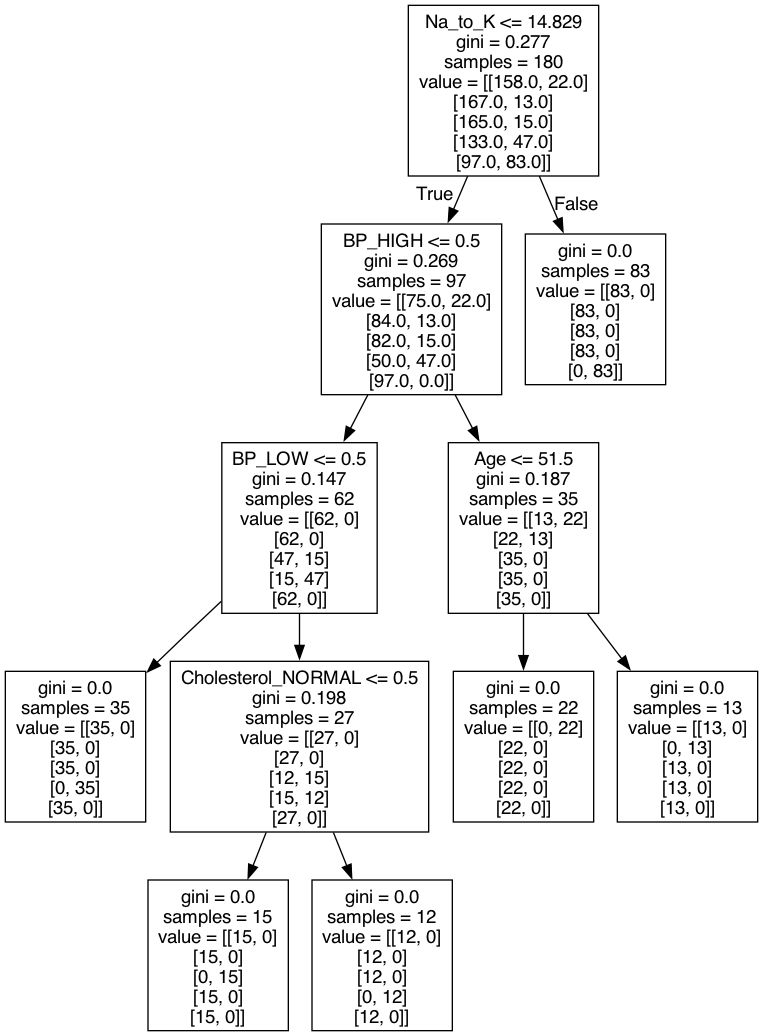

In [44]:
'''
It exports the decision tree to a Graphviz .dot file, uses Graphviz to generate a .png image from the .dot file, 
and displays the decision tree image inline.
'''

export_graphviz(decisionTree, out_file="tree.dot", feature_names=X.columns)
os.system("dot -Tpng tree.dot -o tree.png")
Image(filename="tree.png", width=400, height=150)

In [45]:
'''
This code generates a text representation of the decision tree using the export_text function.
The resulting text provides a human-readable representation of the decision tree structure.
'''
textRepresentation = export_text(decisionTree)
print(textRepresentation)

|--- feature_8 <= 14.83
|   |--- feature_5 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- feature_0 <= 51.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  51.50
|   |   |   |--- class: 0
|--- feature_8 >  14.83
|   |--- class: 0

